# Team DatenWelle

## Keywords to timeseries

In [9]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os.path as op

In [2]:
# Opening JSON file
f = open('../data/raw/CMS_2010_to_June_2022_ENGLISH.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)
df = pd.DataFrame.from_dict(data)

In [3]:
df = df.sort_values(by= 'lastModifiedDate')
df = df.reset_index()

### Keyword exploration - Angela Merkel

In [4]:
# Make a new df with only articles that have keyword: Angela Merkel
not_angela_indices = []
for i, row in enumerate(df['keywordStrings']):
    if 'Angela Merkel' not in row:
        not_angela_indices.append(i)

df_angela = df.drop(not_angela_indices)


In [6]:
df_angela.lastModifiedDate.values

array(['2010-01-01T06:39:00.000Z', '2010-01-17T20:12:16.000Z',
       '2010-01-22T17:10:00.000Z', ..., '2022-06-09T16:51:14.646Z',
       '2022-06-17T10:34:33.577Z', '2022-06-29T17:49:53.740Z'],
      dtype=object)

In [7]:
df_angela['date_day'] = df_angela.lastModifiedDate.apply(lambda x: x[:10] if x is not None else x)
df_angela['date_month'] = df_angela.lastModifiedDate.apply(lambda x: x[:7] if x is not None else x)

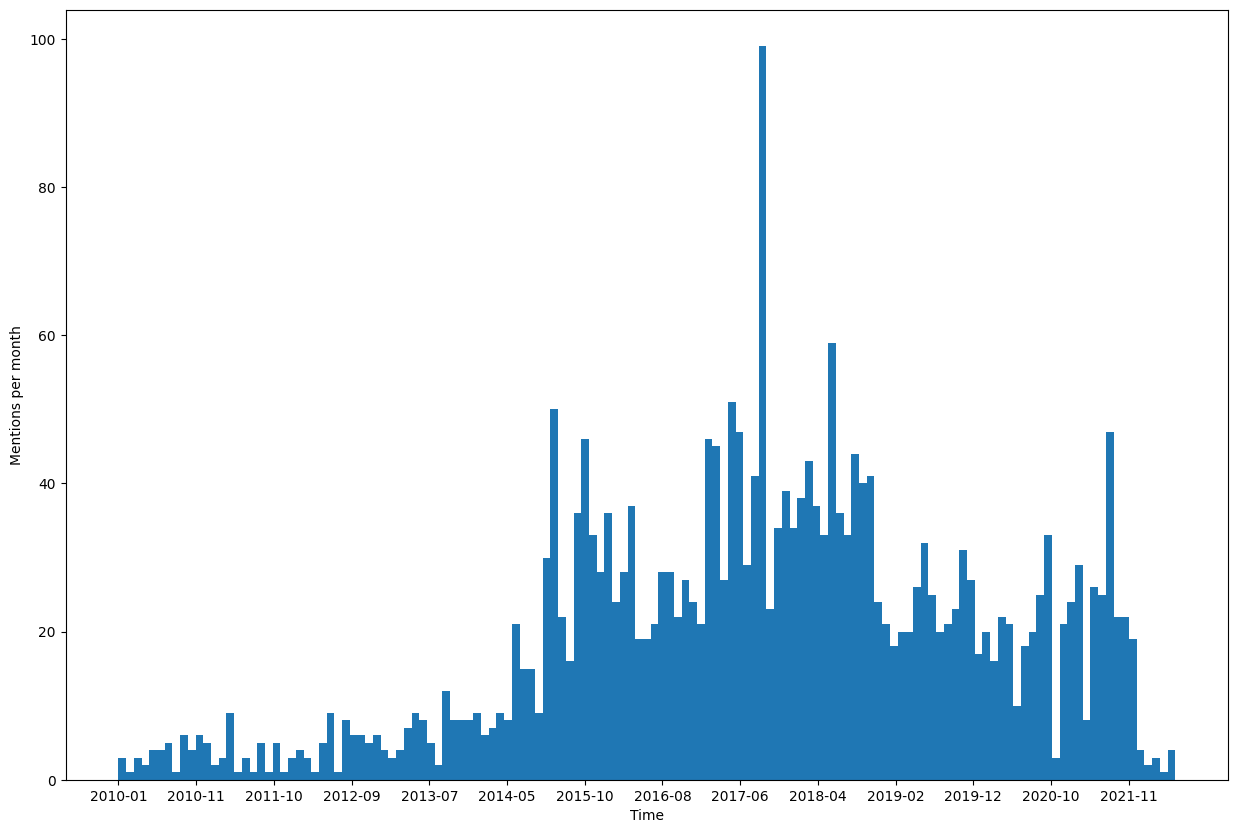

In [10]:
output_dir = '../reports/figures'
fig,ax = plt.subplots(figsize = (15,10))
ax.hist(df_angela.date_month, bins =137)
ax.set_xticks(df_angela.date_month.unique()[::10])
ax.set_xlabel('Time')
ax.set_ylabel('Mentions per month')
fig.savefig(op.join(output_dir,'Angela_Merkel_and_DW_a_love_story.pdf'))
plt.show()